### Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix

### Read the data

In [2]:
df = pd.read_csv('Spam.csv')

In [3]:
df.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.tail()

,Label,EmailText
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [5]:
df.shape

(5572, 2)

### Data Pre-Processing

In [6]:
df.isnull().values.any()

False

In [7]:
df.loc[df['Label'] == 'spam','Label',] = 0
df.loc[df['Label'] == 'ham','Label',] = 1

In [8]:
df = df.drop_duplicates(keep='first')

In [9]:
X = df['EmailText']
Y = df['Label']

In [10]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568               Will Ã_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: EmailText, Length: 5169, dtype: object


In [11]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Label, Length: 5169, dtype: object


### Splitting into Training and Testing Data

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [13]:
print(X.shape, x_train.shape, x_test.shape)

(5169,) (4135,) (1034,)


### Feature Extraction

In [14]:
vectorizer = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)
x_train_f = vectorizer.fit_transform(x_train)
x_test_f = vectorizer.transform(x_test)

In [15]:
print(x_train_f)

  (0, 1828)	0.35592482233751443
  (0, 6421)	0.5950532917415522
  (0, 2703)	0.7205755344386542
  (1, 1888)	0.22516921191243092
  (1, 4342)	0.15929709793058355
  (1, 453)	0.25698446420786897
  (1, 6955)	0.27399320458839144
  (1, 203)	0.27399320458839144
  (1, 6954)	0.27399320458839144
  (1, 7153)	0.24133495616477563
  (1, 4189)	0.23390504161994488
  (1, 4994)	0.19732502227978832
  (1, 3617)	0.27399320458839144
  (1, 2926)	0.23390504161994488
  (1, 2278)	0.27399320458839144
  (1, 5046)	0.27399320458839144
  (1, 4448)	0.22516921191243092
  (1, 4593)	0.27399320458839144
  (1, 5448)	0.27399320458839144
  (2, 5217)	0.29266038116418563
  (2, 6572)	0.2789171638390544
  (2, 5877)	0.29266038116418563
  (2, 1048)	0.26916619596737684
  (2, 5749)	0.29266038116418563
  (2, 3497)	0.24167976131711427
  :	:
  (4132, 6072)	0.24254892947695775
  (4132, 2230)	0.24254892947695775
  (4132, 2)	0.24254892947695775
  (4133, 3778)	0.36842584696755415
  (4133, 2316)	0.4238274869992768
  (4133, 5330)	0.55307649564

In [16]:
print(x_test_f)

  (0, 797)	0.48415917776958733
  (0, 3014)	0.3755569393427584
  (0, 3692)	0.21875536593912145
  (0, 4008)	0.4541039150126108
  (0, 4366)	0.4264504812056483
  (0, 6296)	0.43430701953285156
  (1, 1255)	0.398046282326562
  (1, 1611)	0.47304204171951914
  (1, 2375)	0.5617364019285492
  (1, 5666)	0.35499712111138654
  (1, 7065)	0.41978523395044104
  (2, 3647)	0.6100022125126892
  (2, 7237)	0.7923997102028898
  (3, 2083)	0.4356769422591354
  (3, 4018)	0.3321387620897909
  (3, 4584)	0.4581921231804286
  (3, 6892)	0.504266116821645
  (3, 7308)	0.48543290615925627
  (4, 2514)	0.597985350067042
  (4, 4833)	0.5112231722851113
  (4, 5550)	0.5218991333605264
  (4, 5700)	0.23694703770184997
  (4, 7234)	0.2292199492753507
  (5, 1133)	0.8249139383264974
  (5, 3031)	0.5652583430208418
  :	:
  (1031, 4575)	0.6439113578053595
  (1031, 5201)	0.3701308998039874
  (1031, 5531)	0.32195567890267973
  (1031, 6549)	0.2690294056566008
  (1032, 302)	0.19365520360137561
  (1032, 316)	0.2016497922064975
  (1032, 39

In [17]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

### Build and Train Logistic Regression Model

In [18]:
model1 = LogisticRegression()
model1.fit(x_train_f, y_train)

LogisticRegression()

### Model Evaluation

In [19]:
pred = model1.predict(x_train_f)
accuracy = accuracy_score(y_train, pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

96.2273276904474

In [20]:
pred = model1.predict(x_test_f)
accuracy = accuracy_score(y_test, pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

96.0348162475822

### Classification Report

In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83       140
           1       0.96      1.00      0.98       894

    accuracy                           0.96      1034
   macro avg       0.98      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034



### Confusion Matrix

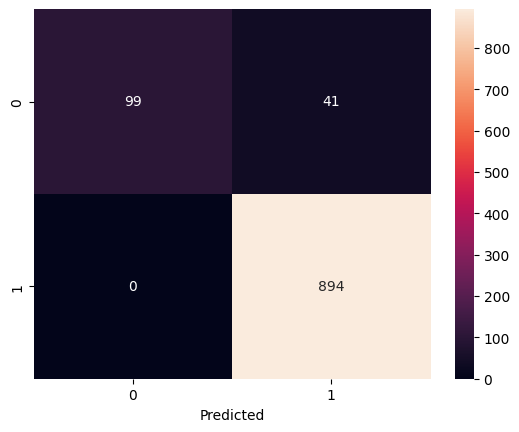

In [22]:
sns.heatmap(confusion_matrix(y_test,model1.predict(x_test_f)),annot = True , fmt ="g")
plt.xlabel("Predicted")
plt.show("Actual")
plt.show()

### Build and Train SVM model

In [23]:
model2 = SVC(C = 1, kernel = "linear" )
model2.fit(x_train_f, y_train)

SVC(C=1, kernel='linear')

### Model Evaluation

In [24]:
pred = model2.predict(x_train_f)
accuracy = accuracy_score(y_train, pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

99.66142684401451

In [25]:
pred = model2.predict(x_test_f)
accuracy = accuracy_score(y_test, pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

98.25918762088975

### Classification Report

In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       140
           1       0.98      1.00      0.99       894

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



### Confusion Matrix

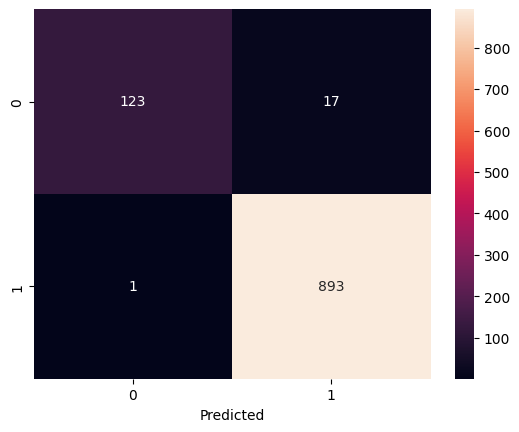

In [27]:
sns.heatmap(confusion_matrix(y_test,model2.predict(x_test_f)),annot = True , fmt ="g")
plt.xlabel("Predicted")
plt.show("Actual")
plt.show()

### Predicting Whether given mail is Spam or Ham using SVM model

In [30]:
input_mail = ["Congratulations! You've won a million dollars. Just send us your credit card details to claim your prize"]
input_data_feature = vectorizer.transform(input_mail)
prediction = model2.predict(input_data_feature)
if(prediction[0] == 1):
    print('Ham Mail')
else:
    print('Spam Mail')

Spam Mail
